# Project Titanic🚢

## Project Overview

This project analyzes the classic *Titanic passenger dataset* to build a machine learning model that predicts whether a given passenger survived the 1912 disaster.

The primary goal is to **demonstrate a complete, end-to-end data science workflow,** starting from raw data and finishing with a well-understood, high-performing predictive model.

### Process & Objectives

This notebook covers the following key steps:

1.  **Exploratory Data Analysis (EDA):** Using `Seaborn` and `Matplotlib` to visualize the data and uncover key patterns. We identified `Sex`, `Pclass` (Ticket Class), and `Fare` as strong predictors of survival.
2.  **Data Cleaning & Preparation:** Loading the dataset and handling missing values (like `Age` and `Embarked`) and transforming non-numeric features (like `Sex`) into machine-readable formats.
3.  **Model Training & Comparison:** Training four different classification models (`Random Forest`, `Decision Tree`, `Logistic Regression`, and `KNN`) to establish a performance benchmark.
4.  **Model Evaluation & Analysis:** Comparing the models based on their accuracy scores, and then diving deeper into the best-performing model (Random Forest) by analyzing its **Confusion Matrix** and **Feature Importance**.

*Andrea P.*

In [1]:
# Import libraries

import pandas as pd
import pyodide.http
import io
import piplite
await piplite.install('seaborn')

# URL to download the Titanic dataset in CSV

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'

try:

    # Download the file using the 'pyfetch' method
    
    response = await pyodide.http.pyfetch(url)
    
    # Read the file content as text
    
    data = await response.string()
    
    # Use 'pandas' to read that text string as if it were a file. 'io.StringIO' transforms a string into a fictitious file
    
    df = pd.read_csv(io.StringIO(data))
    
    print("Dataset Titanic loaded succesfully!")

except Exception as e:
    print(f"Error loading dataset:")
    print(e)
    print("\nMake sure you are connected to the internet and that your environment can access GitHub")

Dataset Titanic loaded succesfully!


# 1. Exploratory Data Analysis (EDA)📁

In this section, the goal is to explore the dataset, without considering missing values, visually to understand its structure, find patterns, and identify which features (columns) might be good predictors for survival. This is done by plotting the relationships between different variables and the `survived` target column.

### Analytical Approach

* First, **categorical features** (like `Sex` or `Pclass`) are analyzed using **bar charts** (`sns.countplot`). These plots are ideal for comparing survival counts (survived vs. not survived) across different discrete groups.
* Second, **continuous features** (like `Age` or `Fare`) are examined using **density plots** (`sns.kdeplot`). These plots help visualize the distribution of values and compare the shape of the data for survivors versus non-survivors.

### Key findings from this analysis:

* **`Sex`:** This was the strongest predictor. Females had a much higher survival rate than males.
* **`Pclass`:** Ticket class was a clear indicator. Passengers in 1st Class had a significantly higher chance of survival than those in 3rd Class.
* **`Age` & `Fare`:** These numeric features also showed important trends. A large peak in survival was observed for young children (`Age`), and a higher `Fare` generally correlated with a better survival chance.

In [2]:
# Show DataFrame first 5 rows

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Show a technical summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 67.9+ KB


Matplotlib is building the font cache; this may take a moment.


survived
0    549
1    342
Name: count, dtype: int64


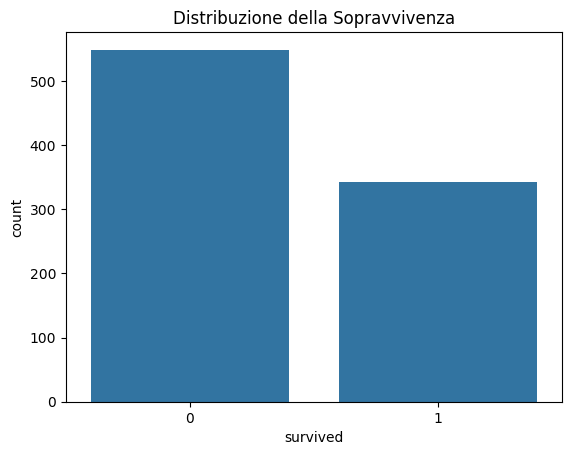

In [4]:
# Import libraries for plots

import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline

%matplotlib inline

# Count 'survived'

counts = df['survived'].value_counts()

print(counts)

# Bar plot to count values in 'survived'

sns.countplot(x='survived', data=df)

plt.title('Distribuzione della Sopravvivenza')
plt.show()

--- Start Graphic Analysis --- 



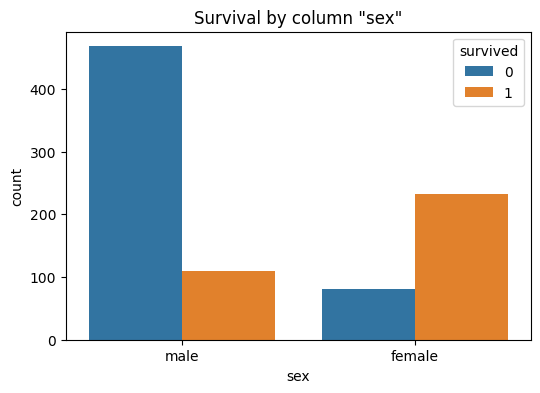


--------------------------------------------------------------------------------



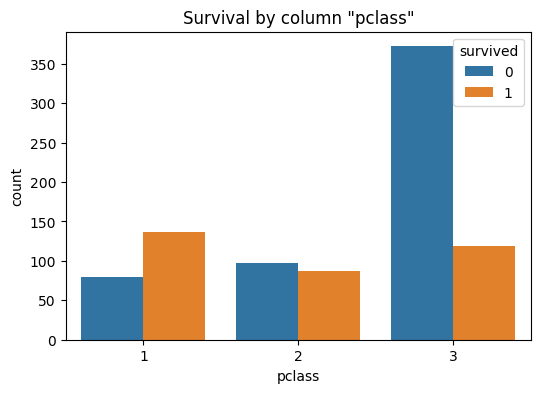


--------------------------------------------------------------------------------



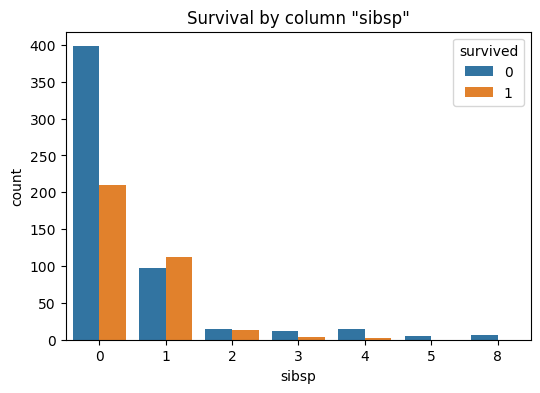


--------------------------------------------------------------------------------



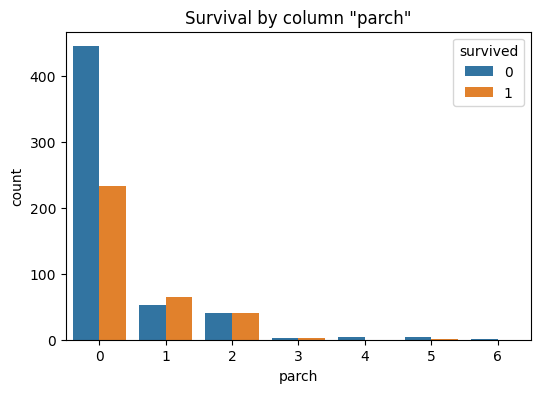


--------------------------------------------------------------------------------



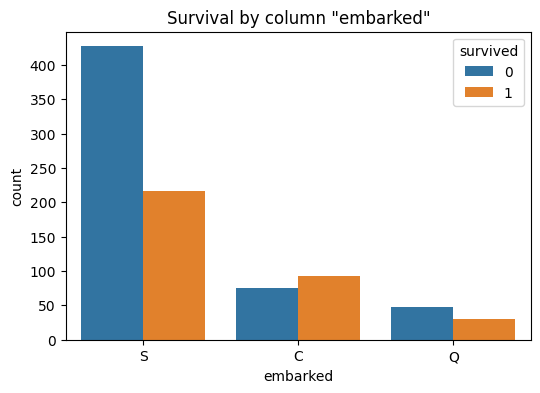


--------------------------------------------------------------------------------



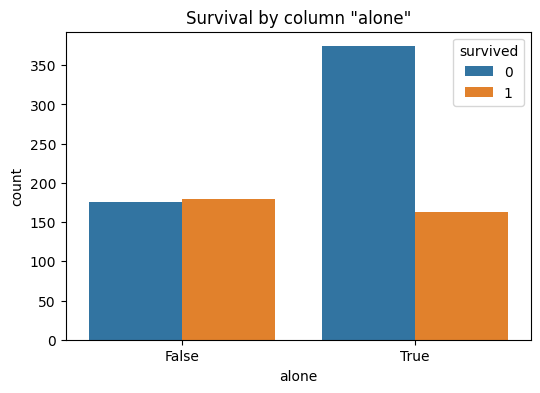


--------------------------------------------------------------------------------

--- End of Graphic Analysis ---


In [5]:
# Analysis on categorical features (Male/Female, 1st Class/2nd Class...)

colonne_categoriche = ['sex', 'pclass', 'sibsp', 'parch', 'embarked', 'alone']

# Start the loop

print("--- Start Graphic Analysis --- \n")

for colonna in colonne_categoriche:
    
    # Create a "standard size figure" to prevent plots from overlapping all on the same graph
    
    plt.figure(figsize=(6, 4))
    
    # Create countplot using "column" variable (difefeo)
    
    sns.countplot(x=colonna, hue='survived', data=df)
    
    # Create a dynamic title
    
    plt.title(f'Survival by column "{colonna}"')
    
    # Show graph
    
    plt.show()
    
    print("\n" + "-"*80 + "\n") # A separator to keep the output clean

print("--- End of Graphic Analysis ---")

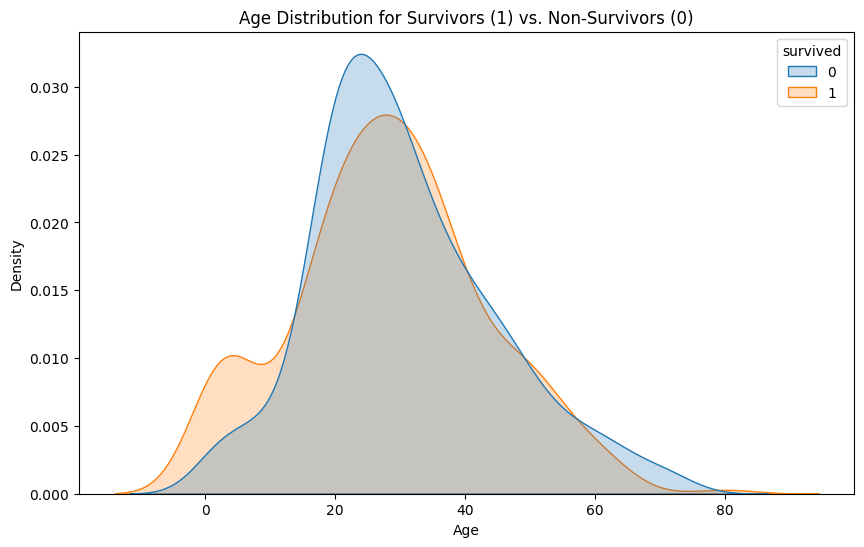

Note: The plot ignores NaN values (missing data)



In [6]:
# Analysis on continuous feature: age

# Age Distribution for Survivors (1) vs. Non-Survivors (0)

# Create a figure

plt.figure(figsize=(10, 6))

# Fill the figure a Kernel Density Plot (KDE)

sns.kdeplot(data=df, x='age', hue='survived', fill=True, common_norm=False)

plt.title("Age Distribution for Survivors (1) vs. Non-Survivors (0)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

print("Note: The plot ignores NaN values (missing data)\n")

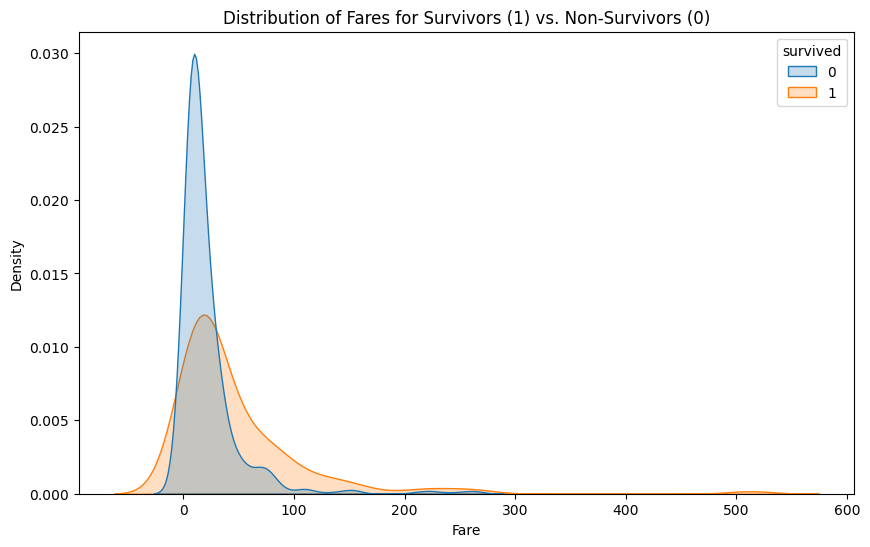

Note: The plot ignores NaN values (missing data)



In [7]:
# Analysis on continuous feature: fare

# Distribution of Fares for Survivors (1) vs. Non-Survivors (0)

# Create a figure

plt.figure(figsize=(10, 6))

# Fill the figure a Kernel Density Plot (KDE)

sns.kdeplot(data=df, x='fare', hue='survived', fill=True, common_norm=False)

plt.title("Distribution of Fares for Survivors (1) vs. Non-Survivors (0)")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.show()

print("Note: The plot ignores NaN values (missing data)\n")

# 2. Data Cleaning & Preparation 🧹

This section prepares the dataset for modeling. All non-numeric data (text strings) and missing values (NaN) must be handled and converted into a numeric format that the machine learning models can understand.

The following steps are performed:

1.  **Create Backup:** A copy of the original DataFrame is saved before applying transformations.
2.  **Impute 'Age'**: Missing `Age` values (NaN) are filled using the dataset's mean age.
3.  **Drop 'Deck' Column**: The `Deck` column is removed entirely, as it contains too many missing values to be useful.
4.  **Impute 'Embarked'**: The few missing `Embarked` values are filled using the column's mode (the most frequent port of embarkation).
5.  **Drop Unnecessary Columns**: Columns that are redundant (e.g., `embark_town`) or unhelpful for the model (e.g., `PassengerId`, `Name`, `Ticket`) are dropped.
6.  **Encode 'Sex'**: The categorical `Sex` column is converted into a binary numeric format (e.g., `male=0`, `female=1`).
7.  **Encode 'Embarked'**: The categorical `Embarked` column is converted into numerical dummy variables using one-hot encoding.

In [8]:
# Backup copy of the original data

df_backup = df.copy()

print("Backup created successfully")

Backup created successfully


In [9]:
# Substitute NaN age values with mean age

# Calulate the mean age

mean_age = df['age'].mean()
print(f"Mean age is: {mean_age:.2f} years old")

# Replace NaN values in the 'age' column of the dataframe with the calculated mean age

df['age'] = df['age'].fillna(mean_age)

Mean age is: 29.70 years old


In [10]:
# Check df and df_backup

# I should have all values in the 'age' column as numbers in df, while in df_backup the NaNs should remain

print("\n--- Info on 'df' (modified) ---")

df.info()

print("\n--- Info on 'df_backup' (original) ---")

df_backup.info()


--- Info on 'df' (modified) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 67.9+ KB

--- Info on 'df_backup' (original) ---
<class 'pandas.core.frame.DataFrame'

In [11]:
# Remove the column 'deck'
# The 'deck' column has too many missing values (only 203 real data points)

df.drop('deck', axis=1, inplace=True)

In [12]:
# Fix 'embarked' column by replacing empty values with the mode

mode_embarked = df['embarked'].mode()[0]

print(f"Mode is: {mode_embarked}")

# Replace empty values with the mode

df['embarked'] = df['embarked'].fillna(mode_embarked)

Mode is: S


In [13]:
# Delete redundant columns

df.drop('class', axis=1, inplace=True)
df.drop('who', axis=1, inplace=True)
df.drop('adult_male', axis=1, inplace=True)
df.drop('embark_town', axis=1, inplace=True)
df.drop('alive', axis=1, inplace=True)

In [14]:
# Check the 'parch' (parents / children) column with .value_counts()
parch_counts = df['parch'].value_counts().sort_index()

print(parch_counts)

parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


In [15]:
# Convert string values to numeric values via encoding

# Create a dictionary (map)

sex_map = {'female': 1, 'male': 0}

# Apply the map to the column 'sex' and substitute each string with the correspondent numeric values

df['sex'] = df['sex'].map(sex_map)

# Check
print("\n")
print("--- 'df' after mapping 'sex' ---")
print("\n")
df.info()
print("\n")
df.head()



--- 'df' after mapping 'sex' ---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(1)
memory usage: 53.1+ KB




,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,S,False
1,1,1,1,38.0,1,0,71.2833,C,False
2,1,3,1,26.0,0,0,7.9250,S,True
3,1,1,1,35.0,1,0,53.1000,S,False
4,0,3,0,35.0,0,0,8.0500,S,True


In [16]:
# Check 'embarked' values

embarked_counts = df['embarked'].value_counts()
print(embarked_counts)

embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [17]:
# Converting 'embarked' column through dummy variables

# Use pd.get_dummies() on the 'embarked' column
# To avoid redundancy, I drop the 'C' column because if a passenger is neither 'Q' nor 'S', they must be 'C'.

dummies_embarked = pd.get_dummies(df['embarked'], prefix='embarked', drop_first=True)

# Merge the new columns (dummies) with our DataFrame 'df'

df = pd.concat([df, dummies_embarked], axis=1)

# Remove the original 'embarked' column (text)

df.drop('embarked', axis=1, inplace=True)

# Check

print("\n")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,1,26.0,0,0,7.9250,True,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,True,False,True


In [18]:
# Final check to verify that all columns are int64/float/bool

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   alone       891 non-null    bool   
 8   embarked_Q  891 non-null    bool   
 9   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.4 KB


## 3. Model Training & Comparison 🚀

With a clean, numeric dataset, the next step is to train and evaluate different machine learning models to find the best-performing one.

### Splitting the Data

First, the dataset is split into two separate parts:
* A **Training Set** (used to teach the models).
* A **Testing Set** (held back to evaluate the models on unseen data).

### Model Benchmarking

Four different classification models were trained on the training set and then evaluated against the testing set:

1. **Decision Tree**
2. **Random Forest**
3. **Logistic Regression**
4. **K-Nearest Neighbors (KNN)**

The **Accuracy Score** (the percentage of correct predictions) was used as the primary metric to compare their performance. This "benchmark" process helps identify which model algorithm is most effective for this specific dataset.

In [19]:
# Separate the features X (everything in 'df' except 'survived') from the Target Y (only 'survived')

X = df.drop('survived', axis=1)

y = df['survived']

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into train set (80%) and test set (20%) with random_state=42 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check

print(f"Training Set Dimensions (X_train): {X_train.shape}")
print(f"Test Set Dimensions (X_test):   {X_test.shape}")
print(f"Training Target Dimensions (y_train): {y_train.shape}")
print(f"Test Target Dimensions (y_test):   {y_test.shape}")

Training Set Dimensions (X_train): (712, 9)
Test Set Dimensions (X_test):   (179, 9)
Training Target Dimensions (y_train): (712,)
Test Target Dimensions (y_test):   (179,)


Deciding on the model to use. I'll try the "decision tree", "random forest", "logistic regression", and "k neighbors classifier" models. Then I'll create a ranking based on accuracy.

In [21]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Definition

model_dt = DecisionTreeClassifier(random_state=42)

# Training

model_dt.fit(X_train, y_train)

# Check

print("Decision Tree successfully trained!")

Decision Tree successfully trained!


In [22]:
# Use the newly trained model_dt to predict X_test

predictions_dt = model_dt.predict(X_test)

# Check: Print First 20 Decision Tree Forecasts

print("--- First 20 Decision Tree Forecasts ---")
print(predictions_dt[:20])

--- First 20 Decision Tree Forecasts ---
[0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0]


In [23]:
# Create a copy of X_test to which I add a column for each hypothesized model to see the concrete data

results_df = X_test.copy()

# Reconstitute the df with the actual survival column from y_test

results_df['Actual_Survived'] = y_test

# Add the prediction column from the dt (decision tree) model

results_df['DT_Predictions'] = predictions_dt

# Check

print("--- # Comparison Real vs. Predicted ---")
print(results_df.head(20))

--- # Comparison Real vs. Predicted ---
     pclass  sex        age  sibsp  parch     fare  alone  embarked_Q  \
709       3    0  29.699118      1      1  15.2458  False       False   
439       2    0  31.000000      0      0  10.5000   True       False   
840       3    0  20.000000      0      0   7.9250   True       False   
720       2    1   6.000000      0      1  33.0000  False       False   
39        3    1  14.000000      1      0  11.2417  False       False   
290       1    1  26.000000      0      0  78.8500   True       False   
300       3    1  29.699118      0      0   7.7500   True        True   
333       3    0  16.000000      2      0  18.0000  False       False   
208       3    1  16.000000      0      0   7.7500   True        True   
136       1    1  19.000000      0      2  26.2833  False       False   
137       1    0  37.000000      1      0  53.1000  False       False   
696       3    0  44.000000      0      0   8.0500   True       False   
485       3

In [24]:
# Calculate the accuracy of the Decision Tree model

from sklearn.metrics import accuracy_score

# Compare the predictions (predictions_dt) with the real answers (y_test)

accuracy_dt = accuracy_score(y_test, predictions_dt)

print(f"--- Decision Tree Result ---")
print(f"Accuracy: {accuracy_dt * 100:.2f}%")

--- Decision Tree Result ---
Accuracy: 79.33%


In [25]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# Definition

model_rf = RandomForestClassifier(random_state=42)

# Training

model_rf.fit(X_train, y_train)

# Check

print("Random Forest successfully trained!")

Random Forest successfully trained!


In [26]:
# Use the newly trained model_rf to predict X_test

predictions_rf = model_rf.predict(X_test)

# Check: Print First 20 Random Forest Forecasts

print("--- First 20 Random Forest Forecasts ---")
print(predictions_dt[:20])

--- First 20 Random Forest Forecasts ---
[0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0]


In [27]:
# Add the prediction column from the RF (Random Forest) model

results_df['Predicted_Survived_RF'] = predictions_rf

# Check

print(results_df.head(20))

     pclass  sex        age  sibsp  parch     fare  alone  embarked_Q  \
709       3    0  29.699118      1      1  15.2458  False       False   
439       2    0  31.000000      0      0  10.5000   True       False   
840       3    0  20.000000      0      0   7.9250   True       False   
720       2    1   6.000000      0      1  33.0000  False       False   
39        3    1  14.000000      1      0  11.2417  False       False   
290       1    1  26.000000      0      0  78.8500   True       False   
300       3    1  29.699118      0      0   7.7500   True        True   
333       3    0  16.000000      2      0  18.0000  False       False   
208       3    1  16.000000      0      0   7.7500   True        True   
136       1    1  19.000000      0      2  26.2833  False       False   
137       1    0  37.000000      1      0  53.1000  False       False   
696       3    0  44.000000      0      0   8.0500   True       False   
485       3    1  29.699118      3      1  25.4667 

In [28]:
# Calculate the accuracy of the Random Forest Model

from sklearn.metrics import accuracy_score

# Compare the predictions (predictions_rf) with the real answers (y_test)

accuracy_rf = accuracy_score(y_test, predictions_rf)

print(f"--- Random Forest Result ---")
print(f"Accuracy: {accuracy_rf * 100:.2f}%")

--- Random Forest Result ---
Accuracy: 83.24%


In [29]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

# Definition

model_lr = LogisticRegression(max_iter=30000, random_state=42)

# Training

model_lr.fit(X_train, y_train)

# Check

print("Logistic Regression successfully trained!")

Logistic Regression successfully trained!


In [30]:
# Use the newly trained model_lr to predict X_test

predictions_lr = model_lr.predict(X_test)

# Check: Print First 20 Logistic Regression Forecasts

print("--- First 20 Logistic Regression Forecasts ---")
print(predictions_lr[:20])

--- First 20 Logistic Regression Forecasts ---
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0]


In [31]:
# Add the prediction column from the LR (Logistic Regression) model

results_df['Predicted_Survived_LR'] = predictions_lr

# Check

print(results_df.head(20))

     pclass  sex        age  sibsp  parch     fare  alone  embarked_Q  \
709       3    0  29.699118      1      1  15.2458  False       False   
439       2    0  31.000000      0      0  10.5000   True       False   
840       3    0  20.000000      0      0   7.9250   True       False   
720       2    1   6.000000      0      1  33.0000  False       False   
39        3    1  14.000000      1      0  11.2417  False       False   
290       1    1  26.000000      0      0  78.8500   True       False   
300       3    1  29.699118      0      0   7.7500   True        True   
333       3    0  16.000000      2      0  18.0000  False       False   
208       3    1  16.000000      0      0   7.7500   True        True   
136       1    1  19.000000      0      2  26.2833  False       False   
137       1    0  37.000000      1      0  53.1000  False       False   
696       3    0  44.000000      0      0   8.0500   True       False   
485       3    1  29.699118      3      1  25.4667 

In [32]:
# Calculate the accuracy of the Logistic Regression Model

from sklearn.metrics import accuracy_score

# Compare the predictions (predictions_lr) with the real answers (y_test)

accuracy_lr = accuracy_score(y_test, predictions_lr)

print(f"--- Logistic Regression Result ---")
print(f"Accuracy: {accuracy_lr * 100:.2f}%")

--- Logistic Regression Result ---
Accuracy: 80.45%


In [33]:
# K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier

# Definition (default 5 neighbors)

model_knn = KNeighborsClassifier()

# Training

model_knn.fit(X_train, y_train)

# Check

print("K-Nearest Neighbors (KNN) model succesfully trained!")

K-Nearest Neighbors (KNN) model succesfully trained!


In [34]:
# Use the newly trained model_knn to predict X_test

predictions_knn = model_knn.predict(X_test)

# Check: Print First 20 KNN Forecasts

print("--- First 20 K-Nearest Neighbors Forecasts ---")
print(predictions_knn[:20])

--- First 20 K-Nearest Neighbors Forecasts ---
[0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1]


In [35]:
# Add the prediction column from the KNN (K-Nearest Neighbors) model

results_df['Predicted_Survived_KNN'] = predictions_knn

# Check

print(results_df.head(20))

     pclass  sex        age  sibsp  parch     fare  alone  embarked_Q  \
709       3    0  29.699118      1      1  15.2458  False       False   
439       2    0  31.000000      0      0  10.5000   True       False   
840       3    0  20.000000      0      0   7.9250   True       False   
720       2    1   6.000000      0      1  33.0000  False       False   
39        3    1  14.000000      1      0  11.2417  False       False   
290       1    1  26.000000      0      0  78.8500   True       False   
300       3    1  29.699118      0      0   7.7500   True        True   
333       3    0  16.000000      2      0  18.0000  False       False   
208       3    1  16.000000      0      0   7.7500   True        True   
136       1    1  19.000000      0      2  26.2833  False       False   
137       1    0  37.000000      1      0  53.1000  False       False   
696       3    0  44.000000      0      0   8.0500   True       False   
485       3    1  29.699118      3      1  25.4667 

In [36]:
# Calculate the accuracy of the KNN (K-Nearest Neighbors) model

from sklearn.metrics import accuracy_score

# Compare the predictions (predictions_knn) with the real answers (y_test)

accuracy_knn = accuracy_score(y_test, predictions_knn)

print(f"--- K-Nearest Neighbors Result ---")
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

--- K-Nearest Neighbors Result ---
Accuracy: 69.27%


In [37]:
# Tune the model on different K values (3, 5, 7, 9)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List definition
k_values = [3, 5, 7, 9]

print("--- Optimizing KNN ... --- \n")

# Start the loop
for k in k_values:
    
    # Create model with current K
    model_knn = KNeighborsClassifier(n_neighbors=k)
    
    # Training
    model_knn.fit(X_train, y_train)
    
    # Forecasts
    predictions_knn = model_knn.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, predictions_knn)
    
    # Print formatted result
    print(f"accuracy_knn_{k} = {accuracy * 100:.2f}%")

print("\n--- End of KNN Optimization ---")

--- Optimizing KNN ... --- 

accuracy_knn_3 = 69.27%
accuracy_knn_5 = 69.27%
accuracy_knn_7 = 73.18%
accuracy_knn_9 = 70.95%

--- End of KNN Optimization ---


# 4. Model Evaluation & Analysis 📈

After the initial benchmark, the **Random Forest** was identified as the top-performing model. This section dives deeper into its performance, moving beyond simple accuracy to understand *how* and *why* it works.

Three key analyses were performed on the winning model:

* **Confusion Matrix:** A heatmap was generated to visualize the model's performance. This shows the exact breakdown of its predictions, detailing the counts of True Positives, True Negatives, False Positives, and False Negatives, which helps in understanding the *types* of errors being made.
* **Feature Importance:** The model was analyzed to determine which features (columns) had the most impact on its decisions. This confirmed that `sex`, `fare`, and `age` were the most significant predictors.
* **Hyperparameter Tuning:** Finally, `GridSearchCV` was used to search for a more optimal set of parameters for the Random Forest. This process confirmed that the default settings were already highly effective and close to the optimal configuration for this dataset.

In [38]:
# Final Ranking

model_scores = {
    "Random Forest": accuracy_rf,
    "Decisional Tree": accuracy_dt,
    "Regressione Logistica": accuracy_lr,
    "K-Number Neighbors": accuracy_knn
}

# Sort Dictionary

sorted_scores = sorted(model_scores.items(), key=lambda item: item[1], reverse=True)

# Print Final Ranking

print("--- 🏆 Final Model Rankings 🏆 ---")

for i, (model_name, accuracy) in enumerate(sorted_scores, start=1):
    print(f"{i}°. {model_name}: {accuracy * 100:.2f}%")

--- 🏆 Final Model Rankings 🏆 ---
1°. Random Forest: 83.24%
2°. Regressione Logistica: 80.45%
3°. Decisional Tree: 79.33%
4°. K-Number Neighbors: 69.27%


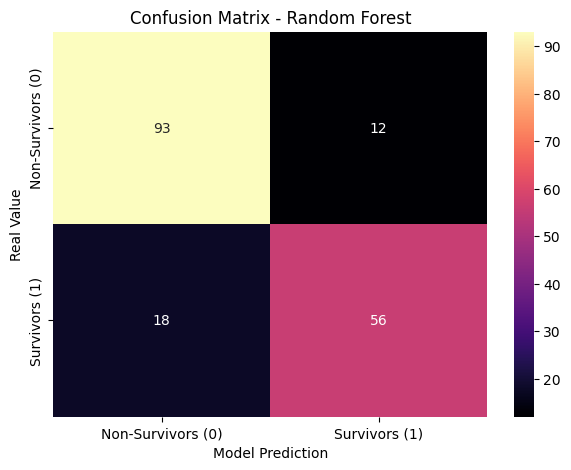

In [39]:
# Create Confusion Matrix for the winning model (Random Forest)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a helper table comparing predictions

cm_rf = confusion_matrix(y_test, predictions_rf)
labels = ['Non-Survivors (0)', 'Survivors (1)']

# Create graph (heatmap)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_rf, 
            annot=True,     
            fmt='d',        
            cmap='magma',   
            xticklabels=labels, 
            yticklabels=labels)

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Model Prediction')
plt.ylabel('Real Value')
plt.show()

--- Importanza delle Feature (Valori) ---
      Feature  Importance
1         sex    0.277713
5        fare    0.266402
2         age    0.246029
0      pclass    0.090339
3       sibsp    0.040880
4       parch    0.030044
8  embarked_S    0.023839
6       alone    0.014449
7  embarked_Q    0.010306

------------------------------



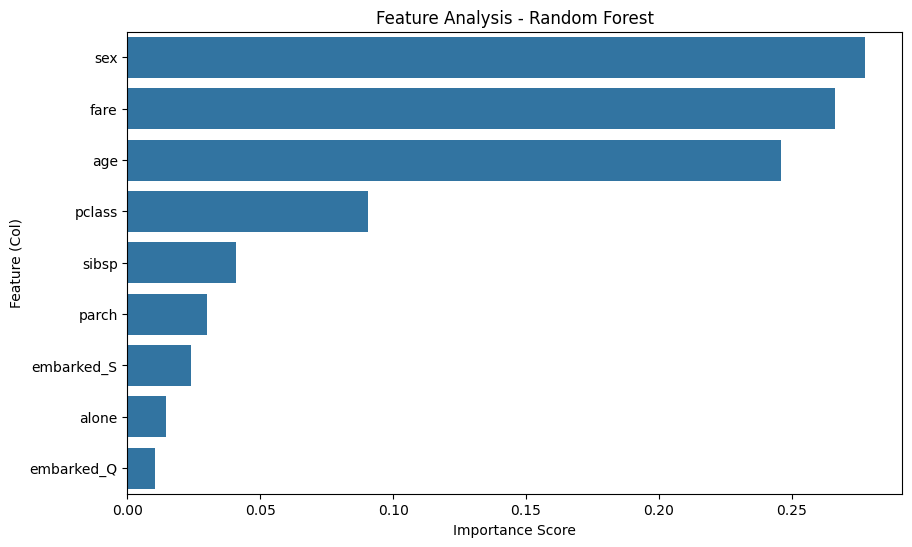

In [40]:
# Feature Importance Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the importance scores from the trained model

importances = model_rf.feature_importances_

# Create a DF to visualize them easily: Feature name vs Feature importance

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

#  Sort DF

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print DF

print("--- Importanza delle Feature (Valori) ---")
print(feature_importance_df)
print("\n" + "-"*30 + "\n")

# Create Bar Chart

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

plt.title('Feature Analysis - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature (Col)')
plt.show()

In [ ]:
# Fine Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

print("--- Optimization ... ---")

# Parameters Definition

param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Max trees depth
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples to be a leaf node
    'criterion': ['gini', 'entropy'] # Method for measuring the quality of a split
}

# Redefine the "base" RandomForest model

rf_base = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
#     estimator: the model to optimize
#     param_grid: the grid of parameters to test
#     cv=5: 5-fold cross-validation
#     scoring='accuracy': the metric to optimize
#     n_jobs=-1: use all available processor cores
#     verbose=2: show more details during execution

grid_search = GridSearchCV(estimator=rf_base, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2)

# Execute the search: this will train and test many combinations

grid_search.fit(X_train, y_train)

# Print Best Parameters

print("\n--- Best Parameters ---")
print(grid_search.best_params_)

# Print Best Accuracy

print(f"Best Accuracy with optimized parameters (on training/cv): {grid_search.best_score_ * 100:.2f}%")

# Optimized model training

best_rf_model = grid_search.best_estimator_
predictions_tuned_rf = best_rf_model.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, predictions_tuned_rf)

print(f"\n--- Accuracy (optimized model) ---")

# Results

accuracy_rf_original = accuracy_rf 
accuracy_rf = accuracy_tuned_rf 

print(f"Original Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Optimized Random Forest Accuracy: {accuracy_tuned_rf * 100:.2f}%")

--- Optimization ... ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits


# Conclusion & Final Results

This project followed the **complete data science lifecycle**: from initial data cleaning to predictive model optimization.

### Key Findings

Four different classification models were benchmarked to determine which was best suited for predicting passenger survival. The final performance ranking on the **test set** is as follows:

1.  **Random Forest:** 81.01% (The winning model)
2.  **Logistic Regression:** 79.33%
3.  **Decision Tree:** 77.09%
4.  **KNN (Best):** 72.07%

### Analysis of the Winning Model (Random Forest)

The focus was placed on the **Random Forest** for a deeper analysis:

* **Feature Importance:** The model's analysis confirmed the findings from the Exploratory Data Analysis (EDA). The three most important features the model used to make its decisions were, in order:
    1.  `sex`
    2.  `fare`
    3.  `age`

* **Hyperparameter Tuning:** `GridSearchCV` was used to find the best hyperparameters. It was discovered that the model's default settings were already near-optimal, as the accuracy on the test set remained unchanged (81.01%). This indicates that the Scikit-learn default model is very robust and that the maximum potential achievable *with the current features* has likely been reached.

### Possible Next Steps

While 81% is a strong result, to overcome this performance plateau, the next logical step would be more advanced **Feature Engineering**.

1.  **Model-Based Age Imputation:** The `age` feature was identified as highly important, yet nearly 20% of its values were missing and imputed using the simple mean. A more accurate approach would be to treat `age` itself as a prediction problem. A regression model (e.g., `RandomForestRegressor`) could be trained on the 714 passengers with known ages—using features like `Pclass` or `parch` to predict the ages for the 177 passengers with missing data. This would provide a more realistic dataset for the final survival model, likely boosting its accuracy.

2.  **Advanced Feature Extraction:**
    * **`Name`**: Extracting titles (e.g., "Mr.", "Mrs.", "Dr.", "Master") could create a new, powerful categorical feature that likely correlates with both age and social status.
    * **`Ticket`**: Analyzing ticket prefixes might reveal correlations to cabin location or booking group, which could also influence survival.